In [2]:
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv('C:/Users/HP/Desktop/Vignesh VIT files/Cs-python/Housing.csv')


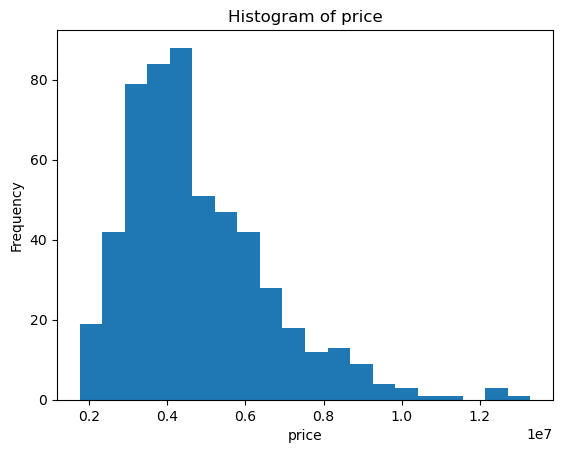

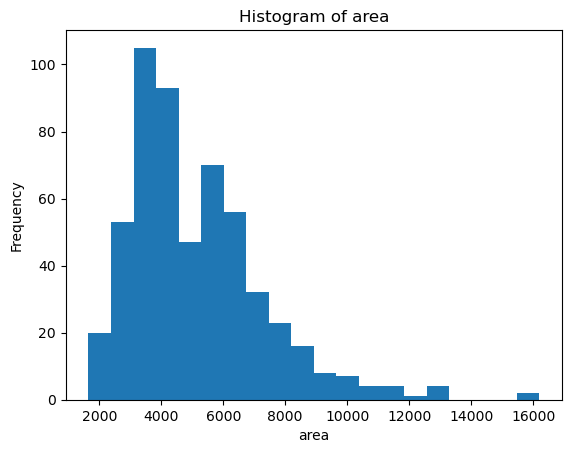

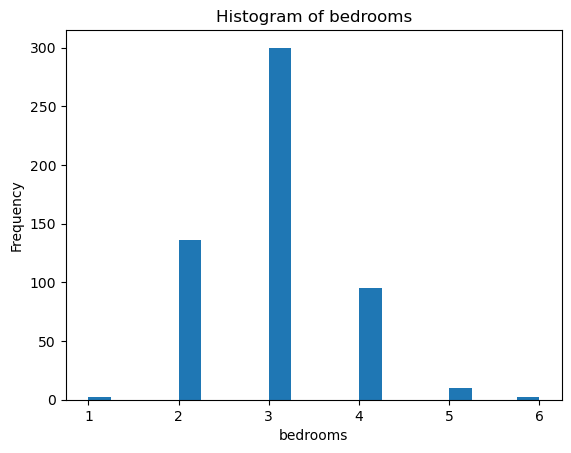

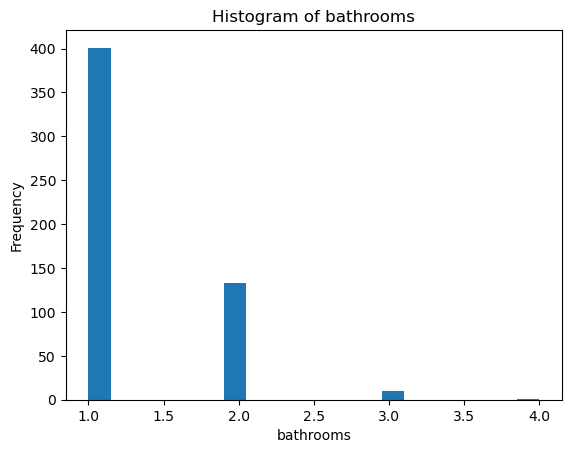

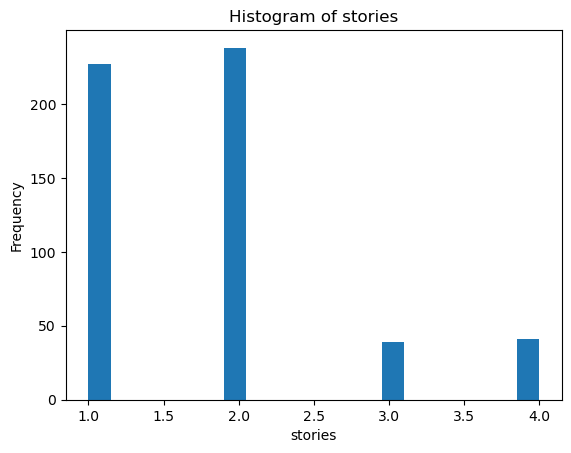

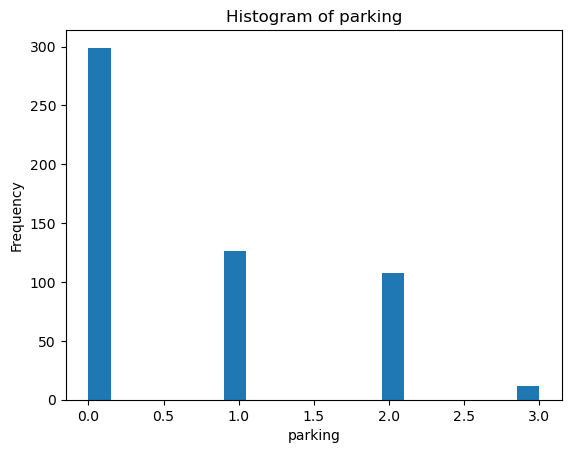

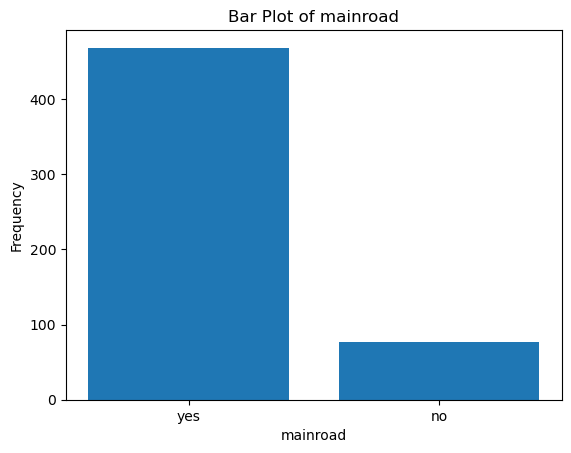

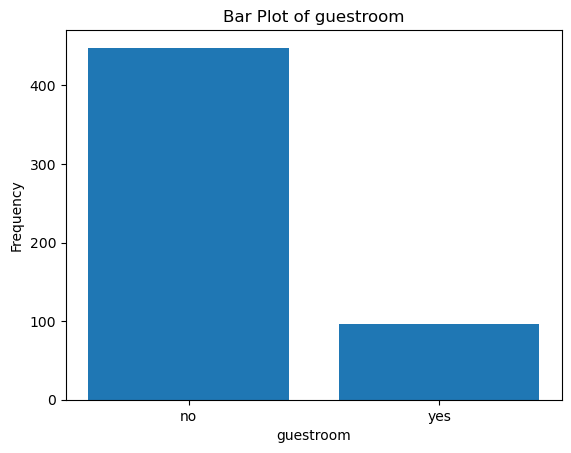

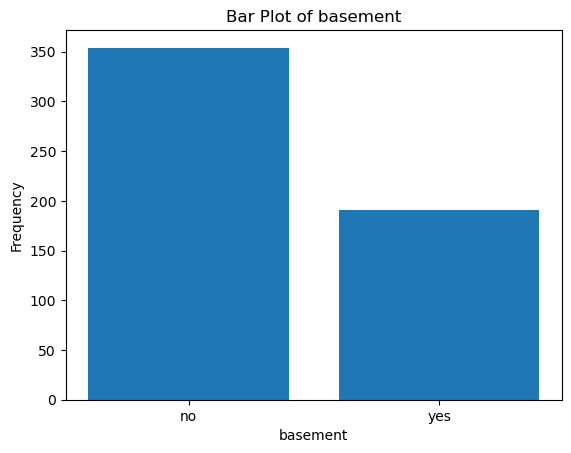

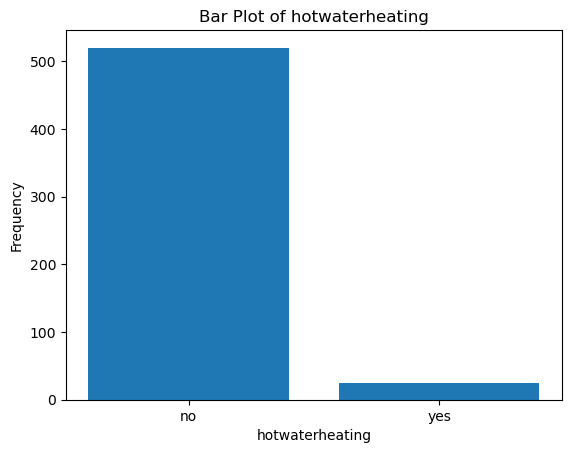

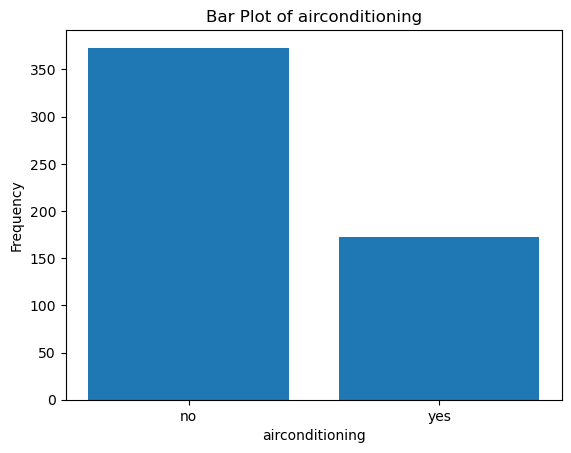

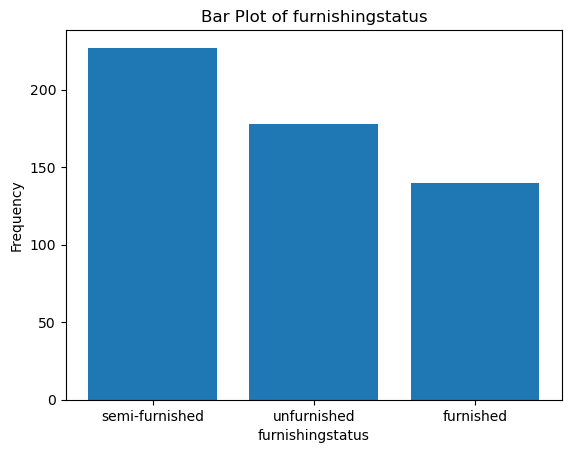

In [6]:
#univariate analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/HP/Desktop/Vignesh VIT files/Cs-python/Housing.csv')

# Histograms for numerical variables
numerical_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for var in numerical_vars:
    plt.hist(data[var], bins=20)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()

# Bar plots for categorical variables
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
for var in categorical_vars:
    plt.bar(data[var].value_counts().index, data[var].value_counts().values)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Bar Plot of {var}')
    plt.show()


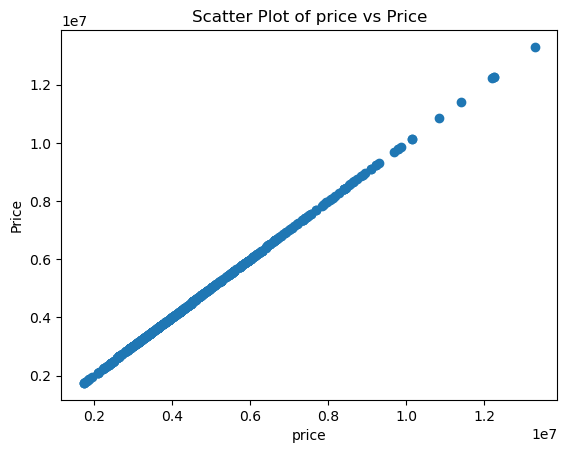

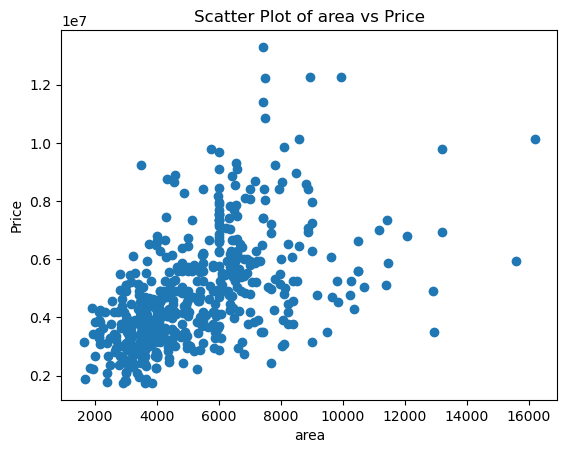

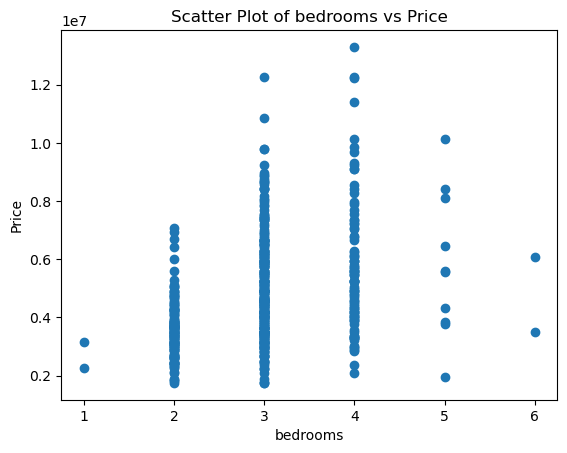

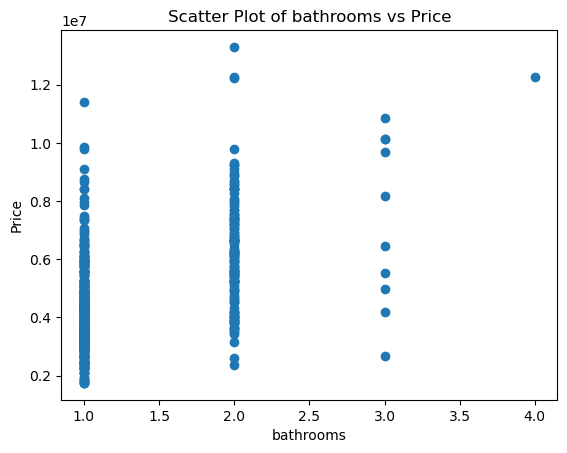

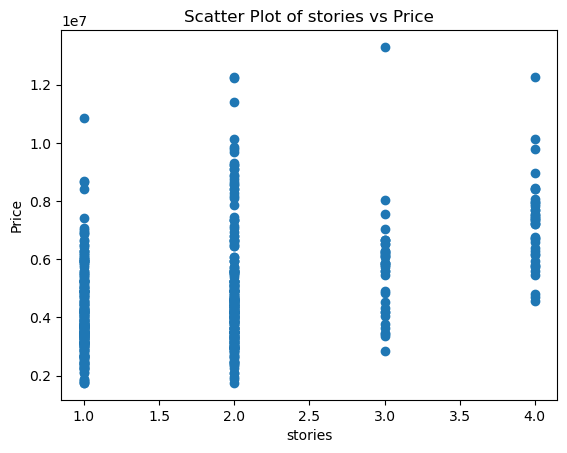

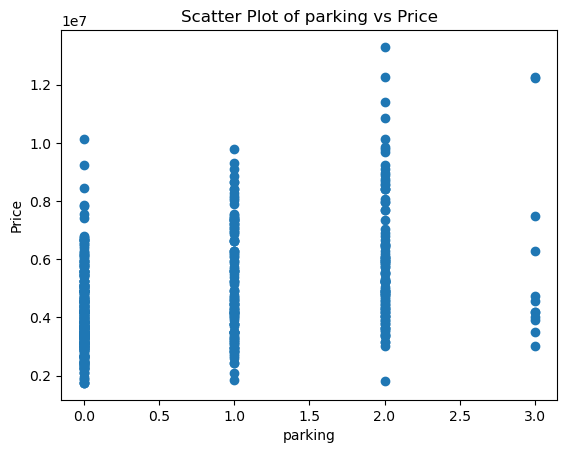

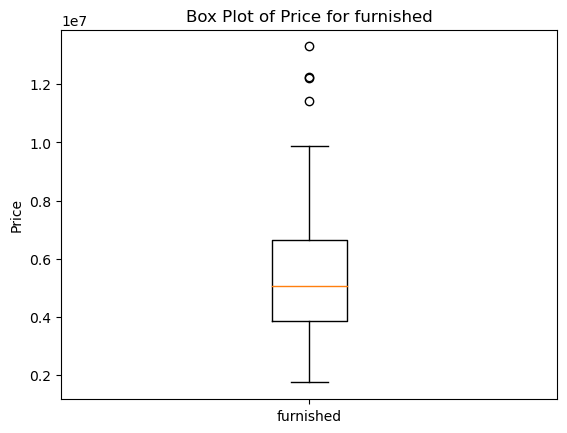

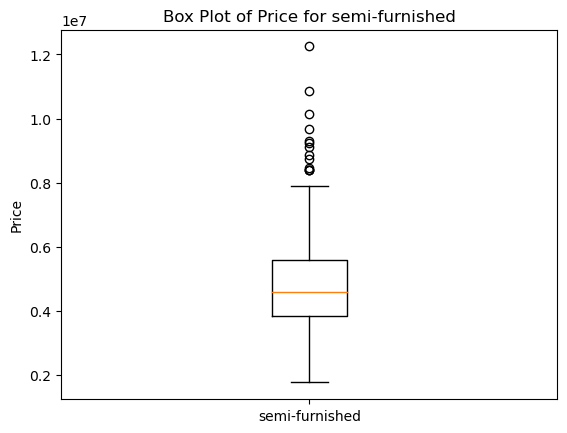

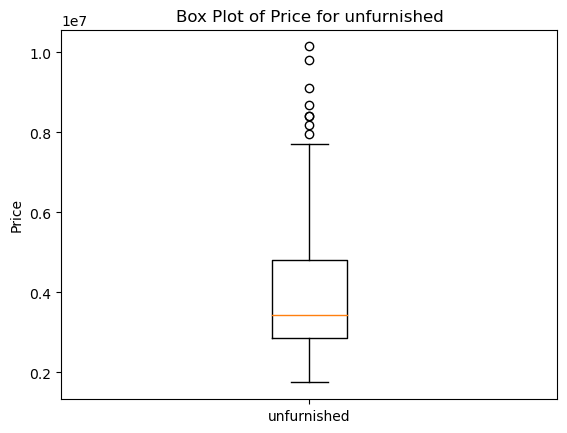

In [7]:
# bivariate analysis
# Scatter plots for numerical variables
numerical_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for var in numerical_vars:
    plt.scatter(data[var], data['price'])
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {var} vs Price')
    plt.show()

# Box plots for comparing numerical variable across categories
categorical_var = 'furnishingstatus'
for category in data[categorical_var].unique():
    plt.boxplot(data[data[categorical_var] == category]['price'], labels=[category])
    plt.ylabel('Price')
    plt.title(f'Box Plot of Price for {category}')
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_15784\1574873233.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


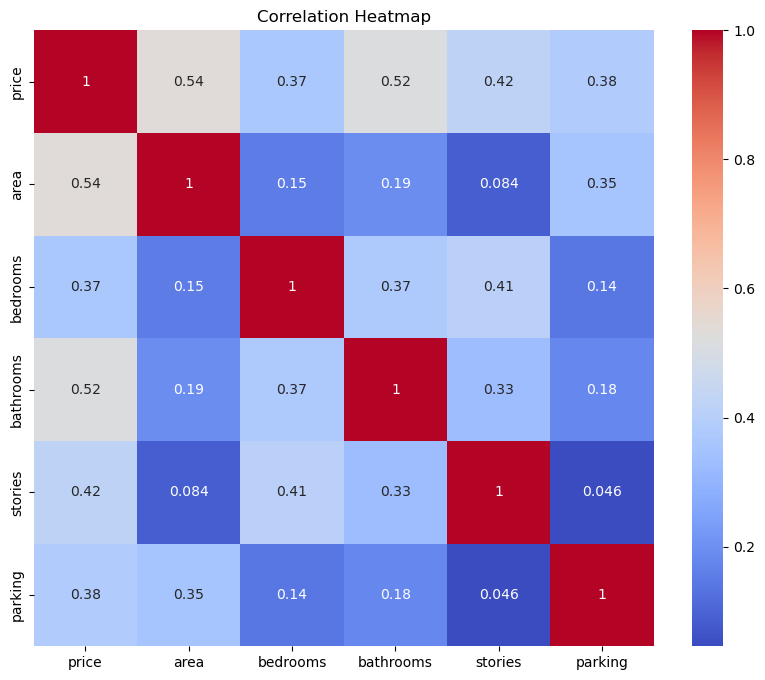

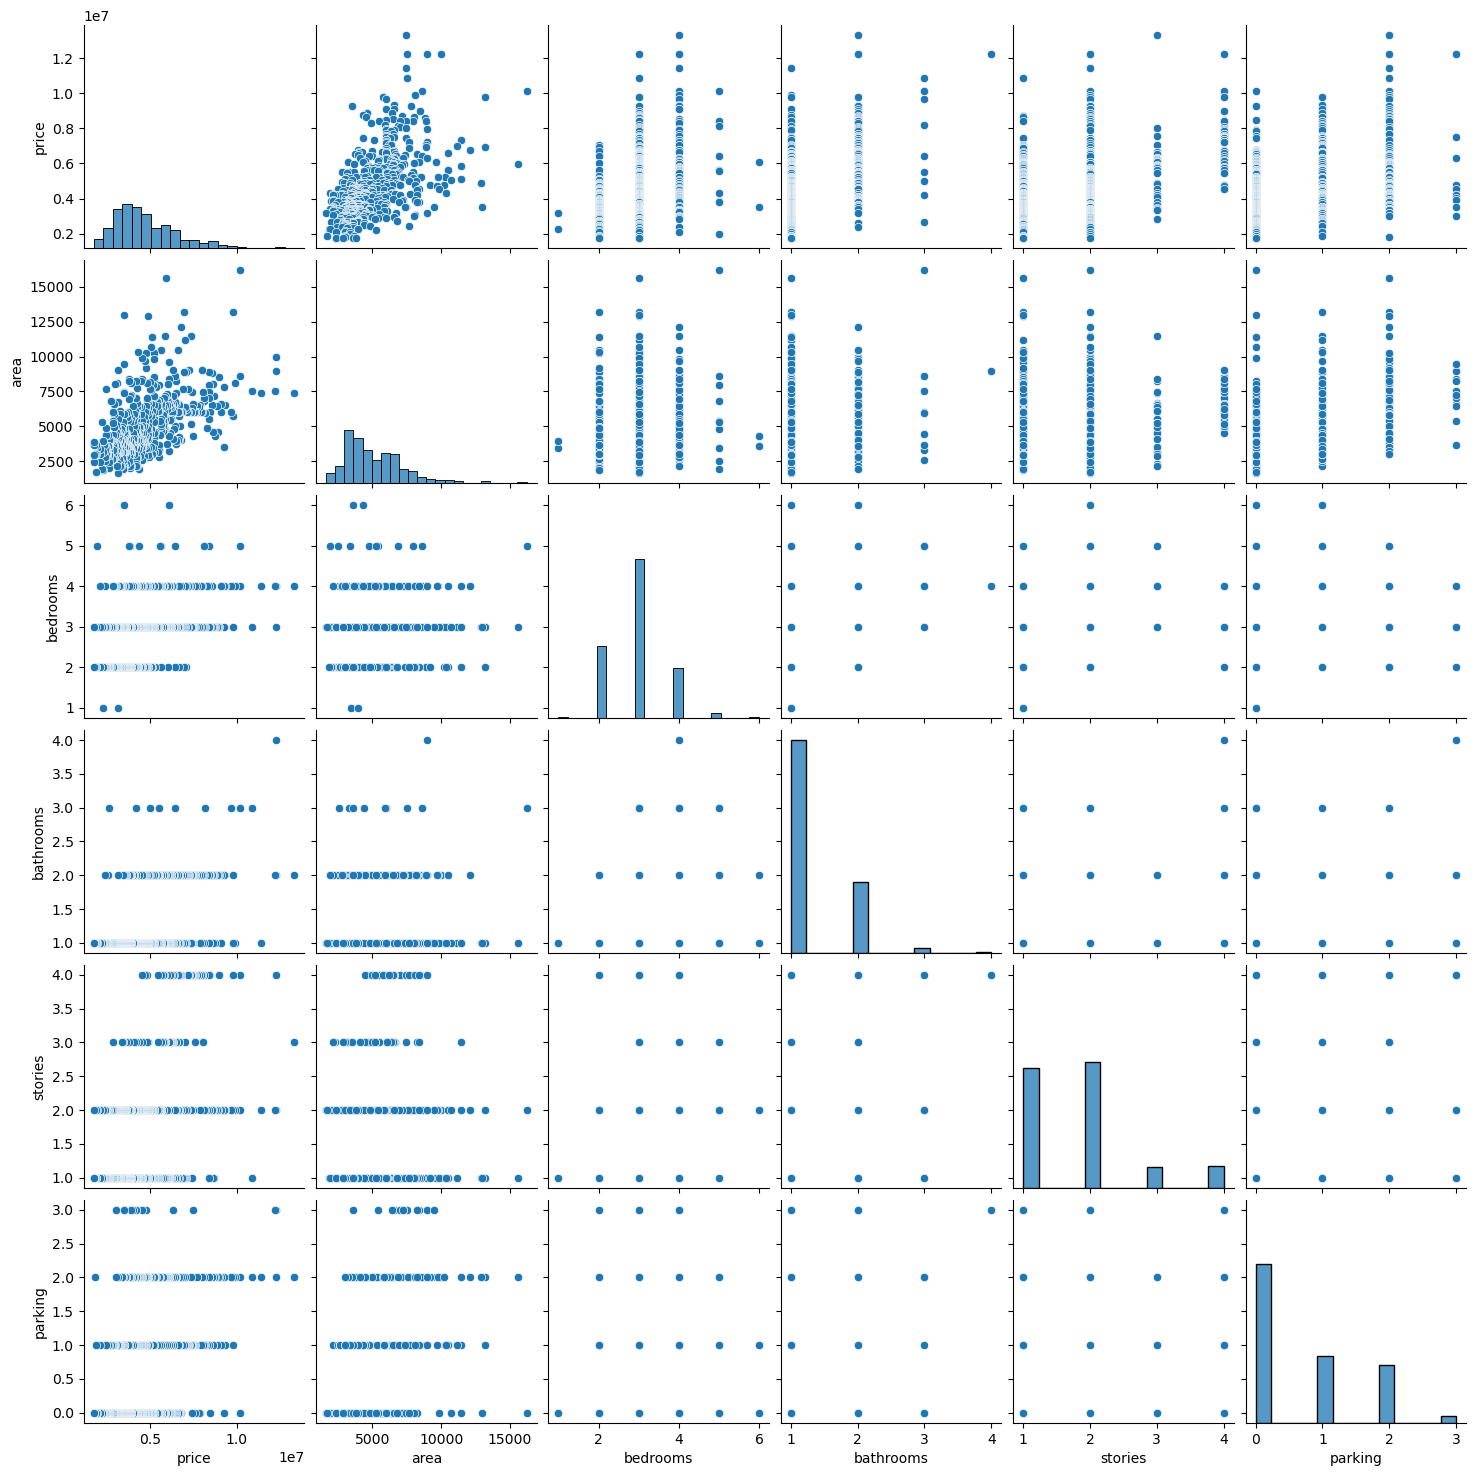

In [8]:
#multivariate analysis
import seaborn as sns

# Correlation Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(data[numerical_vars])
plt.show()


In [9]:
# Display the first few rows of the dataset
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB
None


In [12]:
# Calculate descriptive statistics
numerical_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
statistics = data[numerical_vars].describe()

# Display descriptive statistics
print(statistics)


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [13]:
# data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Handling Missing Values
data.dropna(inplace=True)  # Remove rows with missing values

# Handling Categorical Variables
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(data[categorical_vars]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_vars))
data.drop(categorical_vars, axis=1, inplace=True)
data = pd.concat([data, encoded_df], axis=1)

# Feature Scaling
numerical_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Feature Selection (optional)
selected_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']  # Replace with your selected features
data = data[selected_features]

# Train-Test Split
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use the X_train, y_train for model training and X_test, y_test for evaluation



In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print("Linear Regression Mean Squared Error:", linear_mse)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression Mean Squared Error:", ridge_mse)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression Mean Squared Error:", lasso_mse)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
print("Decision Tree Regression Mean Squared Error:", tree_mse)

# K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
print("KNN Regression Mean Squared Error:", knn_mse)

# Support Vector Regression (SVM)
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
print("SVM Regression Mean Squared Error:", svm_mse)

# Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
print("Random Forest Regression Mean Squared Error:", forest_mse)



Linear Regression Mean Squared Error: 0.6565405133620386
Ridge Regression Mean Squared Error: 0.6568558687911654
Lasso Regression Mean Squared Error: 1.4733655982765146
Decision Tree Regression Mean Squared Error: 1.2705132277519307
KNN Regression Mean Squared Error: 0.7729867281758581
SVM Regression Mean Squared Error: 0.6609718438775517
Random Forest Regression Mean Squared Error: 0.7622551119848846


In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
decision_tree_model = DecisionTreeRegressor()
knn_model = KNeighborsRegressor()
svm_model = SVR()
random_forest_model = RandomForestRegressor()

# Create a dictionary to store the evaluation metrics
metrics = {}

# Fit the models and calculate evaluation metrics
for model in [linear_model, ridge_model, lasso_model, decision_tree_model, knn_model, svm_model, random_forest_model]:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    metrics[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print the evaluation metrics for each model
for model_name, metric_values in metrics.items():
    print(f"{model_name} Evaluation Metrics:")
    print("Mean Squared Error:", metric_values['MSE'])
    print("Mean Absolute Error:", metric_values['MAE'])
    print("R-squared Score:", metric_values['R2'])
    print()


LinearRegression Evaluation Metrics:
Mean Squared Error: 0.6565405133620386
Mean Absolute Error: 0.6033443458552087
R-squared Score: 0.5464062355495867

Ridge Evaluation Metrics:
Mean Squared Error: 0.6568558687911654
Mean Absolute Error: 0.6034615180142903
R-squared Score: 0.5461883613235088

Lasso Evaluation Metrics:
Mean Squared Error: 1.4733655982765146
Mean Absolute Error: 0.9357324588816268
R-squared Score: -0.01792567942482992

DecisionTreeRegressor Evaluation Metrics:
Mean Squared Error: 1.2666358798752793
Mean Absolute Error: 0.7613773863805952
R-squared Score: 0.12490071024182203

KNeighborsRegressor Evaluation Metrics:
Mean Squared Error: 0.7729867281758581
Mean Absolute Error: 0.6312699906285981
R-squared Score: 0.46595533288872437

SVR Evaluation Metrics:
Mean Squared Error: 0.6806617790138153
Mean Absolute Error: 0.5971167798700958
R-squared Score: 0.5297412233110128

RandomForestRegressor Evaluation Metrics:
Mean Squared Error: 0.7533427055187689
Mean Absolute Error: 0.6

In [24]:
# linear regression model is the best as it has lowest Mse or Mae value and highest R2 score

In [1]:
pwd

'C:\\Users\\HP'